In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv('data/studentsurvey.csv')
df.head()

,year,gender,smoke,exercise,tv,height,weight,siblings,birthOrder,verbalSAT,mathSAT,sat,gpa,pulse,piercings
0,Senior,M,No,10.0,1.0,71.0,180.0,4,4.0,540,670,1210,3.13,54,0.0
1,Sophomore,F,Yes,4.0,7.0,66.0,120.0,2,2.0,520,630,1150,2.50,66,3.0
2,FirstYear,M,No,14.0,5.0,72.0,208.0,2,1.0,550,560,1110,2.55,130,0.0
3,Junior,M,No,3.0,1.0,63.0,110.0,1,1.0,490,630,1120,3.10,78,0.0
4,Sophomore,F,No,3.0,3.0,65.0,150.0,1,1.0,720,450,1170,2.70,40,6.0


In [4]:
(df.height/12).describe()

count    355.000000
mean       5.701878
std        0.339879
min        4.916667
25%        5.416667
50%        5.666667
75%        5.916667
max        6.916667
Name: height, dtype: float64

In [5]:
xbar = df.height.mean()/12
sbar = df.height.std()/12
[xbar - sbar, xbar + sbar]

[5.361999289893608, 6.041756578650992]

<AxesSubplot:>

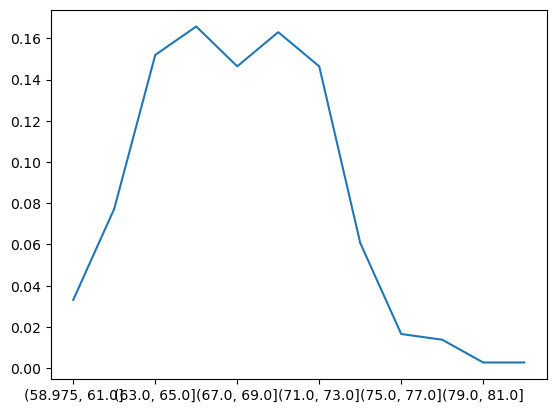

In [6]:
df.height.value_counts(bins=12, normalize=True).sort_index().plot()

<AxesSubplot:xlabel='height', ylabel='Count'>

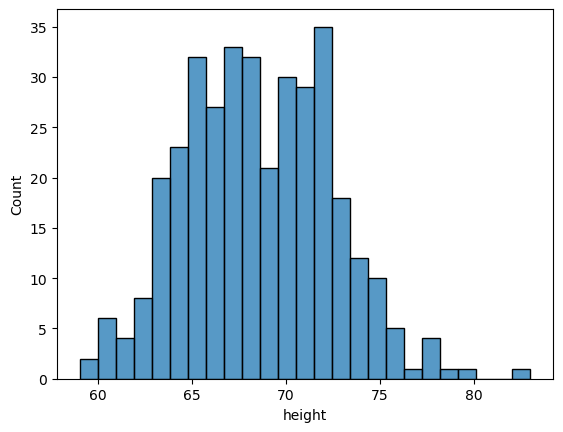

In [7]:
sns.histplot(df.height, bins=25)

In [8]:
df.mathSAT.describe()

count    362.000000
mean     609.436464
std       68.490067
min      400.000000
25%      560.000000
50%      610.000000
75%      650.000000
max      800.000000
Name: mathSAT, dtype: float64

In [9]:
df.mathSAT.value_counts(bins=12, normalize=True).sort_index()

(399.59900000000005, 433.333]    0.013812
(433.333, 466.667]               0.016575
(466.667, 500.0]                 0.035912
(500.0, 533.333]                 0.060773
(533.333, 566.667]               0.140884
(566.667, 600.0]                 0.209945
(600.0, 633.333]                 0.138122
(633.333, 666.667]               0.168508
(666.667, 700.0]                 0.143646
(700.0, 733.333]                 0.038674
(733.333, 766.667]               0.027624
(766.667, 800.0]                 0.005525
Name: mathSAT, dtype: float64

<AxesSubplot:xlabel='mathSAT', ylabel='Count'>

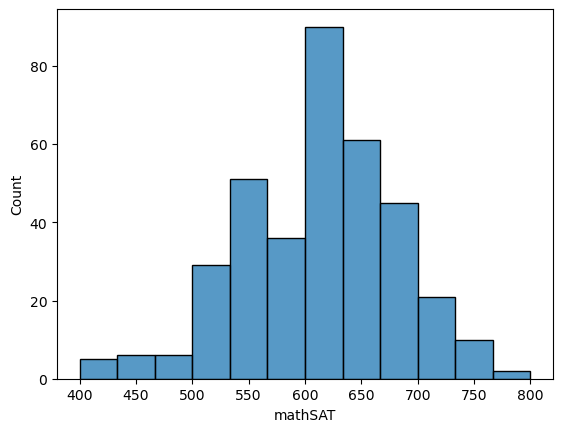

In [10]:
sns.histplot(df.mathSAT, bins=12)

In [11]:
df.gender.value_counts(normalize=True)

M    0.533149
F    0.466851
Name: gender, dtype: float64

In [12]:
df.smoke.value_counts(normalize=True)

No     0.881215
Yes    0.118785
Name: smoke, dtype: float64

In [13]:
df.year.value_counts(normalize=True)

Sophomore    0.541667
FirstYear    0.261111
Senior       0.100000
Junior       0.097222
Name: year, dtype: float64

In [14]:
df.piercings.value_counts(normalize=True).sort_index()

0.0     0.520776
1.0     0.027701
2.0     0.199446
3.0     0.027701
4.0     0.088643
5.0     0.066482
6.0     0.030471
7.0     0.024931
8.0     0.008310
9.0     0.002770
10.0    0.002770
Name: piercings, dtype: float64

In [15]:
# Under-representation
## variable.value < (1 / number of index).value
# Over-representation
## variable.value > (1 / number of index).value

In [16]:
br = pd.read_csv('data/brookline.csv')
br.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0


In [17]:
br[['price', 'bedrooms']].corr()

,price,bedrooms
price,1.000000,0.658619
bedrooms,0.658619,1.000000


In [18]:
corMatrix = br.corr()
corMatrix[['price','rooms']]

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_46695/2468887128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corMatrix = br.corr()


,price,rooms
price,1.000000,0.665161
stNumber,-0.039374,-0.104817
size,0.865468,0.778962
beacon,-0.055239,-0.131285
baseFloor,-0.098550,-0.207358
elevators,-0.123154,-0.253496
rooms,0.665161,1.000000
bedrooms,0.658619,0.845955
fullBathrooms,0.689646,0.567109
halfBathrooms,0.444401,0.301265


In [19]:
corMatrix.price

price            1.000000
stNumber        -0.039374
size             0.865468
beacon          -0.055239
baseFloor       -0.098550
elevators       -0.123154
rooms            0.665161
bedrooms         0.658619
fullBathrooms    0.689646
halfBathrooms    0.444401
garage           0.380783
Name: price, dtype: float64

In [20]:
br[['price', 'beacon']].groupby('beacon').mean()

,price
beacon,
0,520728.878225
1,473759.698276


In [21]:
xbar_beacon = br.price[br.beacon==1].mean()
xbar_nobeacon = br.price[br.beacon==0].mean()
diff = xbar_nobeacon - xbar_beacon
diff / br.price.std()

0.17868202121426255

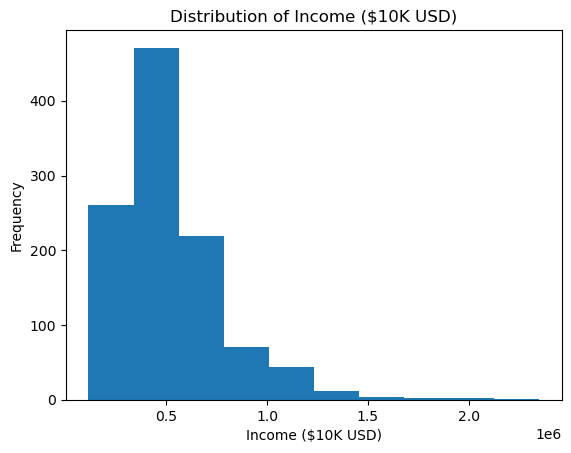

In [22]:
plt.hist(br.price)
plt.title('Distribution of Income ($10K USD)')
plt.xlabel('Income ($10K USD)')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Symmetry

# Bimodal

# Uniformity

In [24]:
ss = pd.read_csv('data/studentsurvey.csv')
ca = pd.read_csv('data/CASchools.csv')

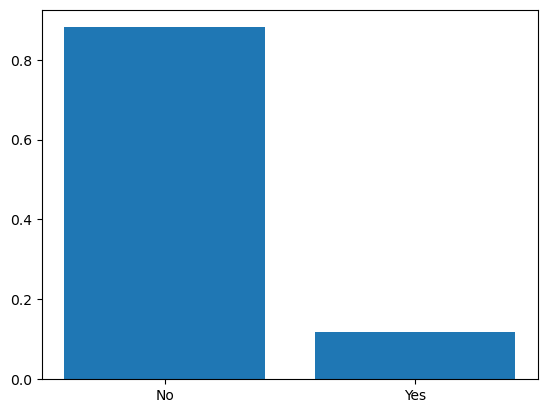

In [25]:
smokeTable = ss.smoke.value_counts(normalize=True)
plt.bar(height=smokeTable, x=smokeTable.index)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

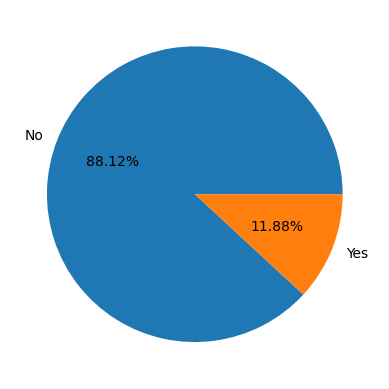

In [26]:
plt.pie(smokeTable, labels=smokeTable.index, autopct='%1.2f%%')
plt.show

<AxesSubplot:xlabel='siblings'>

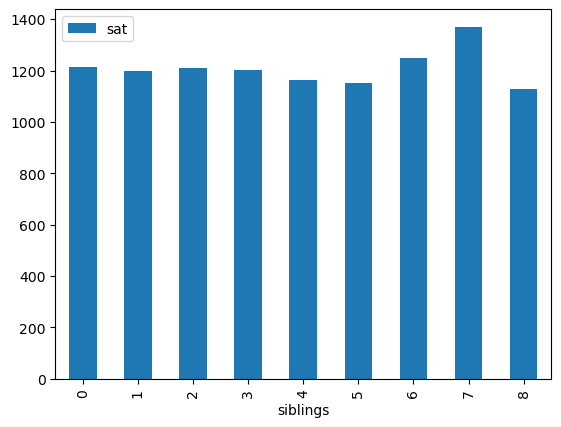

In [27]:
ss[['siblings','sat']].groupby('siblings').mean().plot(kind='bar')

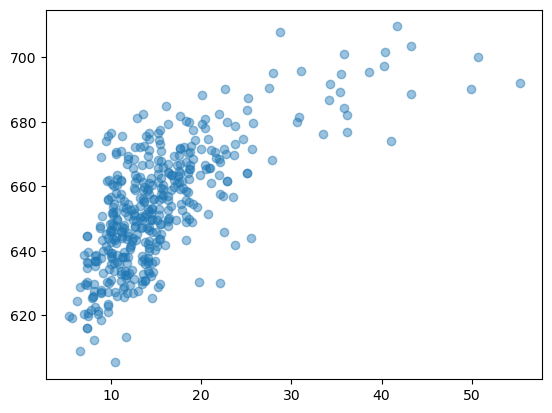

In [28]:
plt.scatter(ca.income, ca.math, alpha=0.45)
plt.show()

In [29]:
# MAGNITUDE
# SIGN
# NON_LINEARITY

In [30]:
ca[['math','income']].corr()

,math,income
math,1.000000,0.699398
income,0.699398,1.000000


<AxesSubplot:xlabel='grades'>

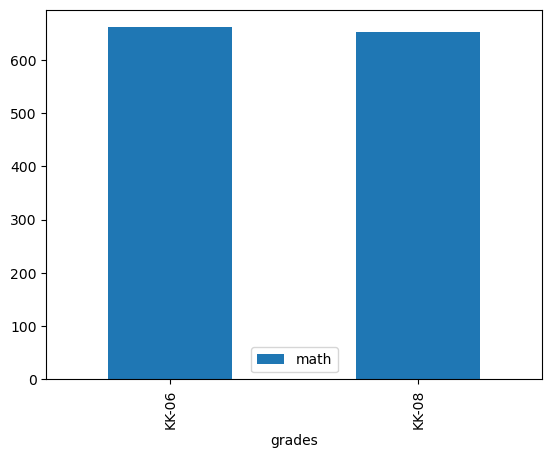

In [31]:
ca[['math','grades']].groupby('grades').mean().plot(kind='bar')

<AxesSubplot:xlabel='grades', ylabel='math'>

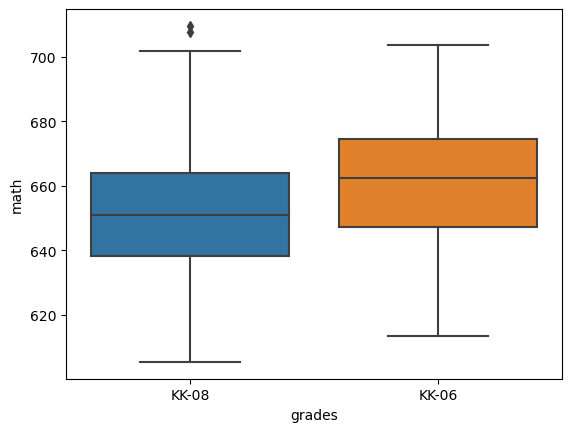

In [32]:
sns.boxplot(data=ca, x='grades', y='math')

In [33]:
# .isin

#### March 14th

In [34]:
ps = pd.read_csv('data/pizzaSales.csv')
ps

,week,pie_sales,price,adv
0,1,350,5.5,3300
1,2,460,7.5,3300
2,3,350,8.0,3000
3,4,430,8.0,4500
4,5,350,6.8,3000
5,6,380,7.5,4000
6,7,430,4.5,3000
7,8,470,6.4,3700
8,9,450,7.0,3500
9,10,490,5.0,4000


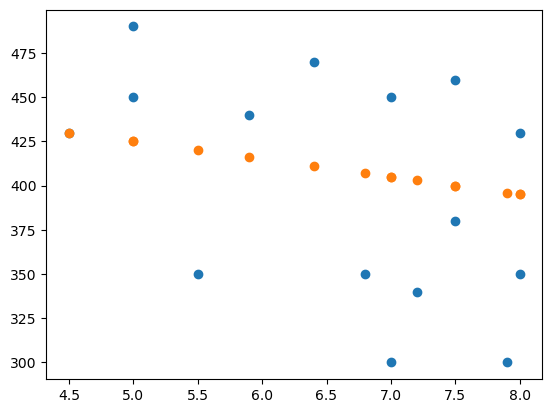

In [35]:
def fitted(b0, b1, x):
    y = b0 + b1 * x
    return y

ps['fittedValues'] = fitted(475, -10, ps.price)
ps['residuals'] = ps.pie_sales
ps[['pie_sales', 'fittedValues', 'price']]

plt.scatter(x=ps.price, y=ps.pie_sales)
plt.scatter(x=ps.price, y=ps.fittedValues)
plt.show()

In [36]:
# ORDINARY LEAST SQUARES (OLS)

import statsmodels.formula.api as smf

model = smf.ols('pie_sales ~ price', data = ps)
results = model.fit()
results.params

Intercept    558.277250
price        -24.033858
dtype: float64

### March 16th

In [37]:
br = pd.read_csv('data/brookline.csv')
br.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0


In [38]:
# Estimating Beta Coefficients (Intercept, Slope)

import statsmodels.formula.api as smf

# STEP 1: SPECIFY MODEL
model = smf.ols('price ~ size', data = br)

# STEP 2: ESTIMATION
results = model.fit()

# STEP 3: EXTRACT RESULTS
results.params

Intercept    12934.124023
size           407.451333
dtype: float64

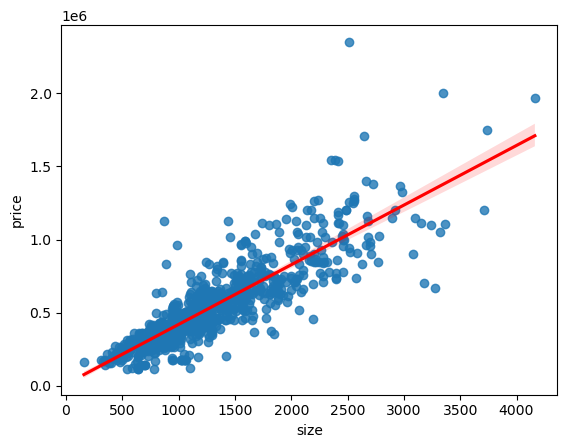

In [39]:
# GOODNESS OF FIT

sns.regplot(x= br['size'], y= br.price, line_kws = {'color':'red'})
plt.show()

In [40]:
# RSQUARED

results.rsquared

0.7490352448530875

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     3232.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:15:08   Log-Likelihood:                -14329.
No. Observations:                1085   AIC:                         2.866e+04
Df Residuals:                    1083   BIC:                         2.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.293e+04   9705.712      1.333      0.183   -6110.006     3.2e+04
size         407.4513      7.167     56.854      0.000     393.389     421.513
==============================================================================
Omnibus:                      456.223   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8271.768
Skew:                           1.463   Prob(JB):                         0.00
Kurtosis:                      16.206   Cond. No.                     3.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# Univariate
# y = b0 + b1 x + error
# y = dependent 
# x = independent
# b0 = intercept (avg y when x = 0)
# b1 = slope (avg delta y when delta x = 1)
# Error = other factors (z -> y; z != x)

# Multivariate
# y = b0 + b1 x1 + b2 x2 + ... + bk xk + error
# b0 = intercept (avg y when all xi = 0)
# b1 = slope (avg delta y when delta xi = 1; while keeping all other x variables constant)

In [43]:
br.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0


In [44]:
import statsmodels.formula.api as smf

model = smf.ols('price ~ beacon + size ', data = br)
results = model.fit()
print(results.params)
print(results.rsquared)

Intercept     6981.353007
beacon       32935.891941
size           409.421852
dtype: float64
0.7505180922644176


In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1627.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:15:08   Log-Likelihood:                -14326.
No. Observations:                1085   AIC:                         2.866e+04
Df Residuals:                    1082   BIC:                         2.867e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6981.3530   9961.969      0.701      0.484   -1.26e+04    2.65e+04
beacon      3.294e+04    1.3e+04      2.536      0.011    7452.263    5.84e+04
size         409.4219      7.191     56.936      0.000     395.312     423.531
==============================================================================
Omnibus:                      457.231   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8438.199
Skew:                           1.462   Prob(JB):                         0.00
Kurtosis:                      16.345   Cond. No.                     4.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

### March 23rd

In [46]:
import statsmodels.formula.api as smf

model = smf.ols('price ~ beacon', data=br)
results = model.fit()
results.params

Intercept    520728.878225
beacon       -46969.179949
dtype: float64

In [47]:
# Ways to not reject hypothesis:
# 1. p value is higher than 0.05
# 2. within the 95% confidence interval
# 3. absolute value of t is less than 1.96

In [48]:
br['chapel'] = 0
br.chapel[br.stName == 'CHAPEL ST'] = 1

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_46695/832659157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  br.chapel[br.stName == 'CHAPEL ST'] = 1


In [49]:
br[br.stName == 'CHAPEL ST']

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage,chapel
6,676000,20,CHAPEL ST,1561,0,7,HIGH-RISE,6,6,2,2,0,2.0,1
18,288000,20,CHAPEL ST,876,0,0,HIGH-RISE,6,4,1,2,0,0.0,1
31,250000,20,CHAPEL ST,710,0,0,HIGH-RISE,6,4,1,1,0,0.0,1
35,312000,20,CHAPEL ST,566,0,2,HIGH-RISE,6,4,1,1,0,0.0,1
36,528000,20,CHAPEL ST,1141,0,3,HIGH-RISE,6,5,2,2,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,273000,20,CHAPEL ST,683,0,0,HIGH-RISE,6,4,1,1,0,0.0,1
609,350000,20,CHAPEL ST,1115,0,0,HIGH-RISE,6,5,2,2,0,0.0,1
858,772500,20,CHAPEL ST,1515,0,7,HIGH-RISE,6,6,2,2,0,2.0,1
890,461000,20,CHAPEL ST,945,0,2,HIGH-RISE,6,5,2,1,0,1.0,1


In [50]:
model = smf.ols('price ~ beacon + chapel', data=br)
results = model.fit()
results.params

Intercept    522322.189732
beacon       -48562.491456
chapel       -21149.573294
dtype: float64

In [51]:
import statsmodels.formula.api as smf

model = smf.ols('price ~ C(buildingStyle)', data=br)
results = model.fit()
results.params

Intercept                              733868.750000
C(buildingStyle)[T.CONVERTED-HOUSE]    -45880.885135
C(buildingStyle)[T.DECKER]            -136890.849174
C(buildingStyle)[T.DUPLEX]              73811.250000
C(buildingStyle)[T.HIGH-RISE]         -321138.925115
C(buildingStyle)[T.LOW-RISE]          -232683.237685
C(buildingStyle)[T.MID-RISE]          -282654.552469
C(buildingStyle)[T.OTHER]              458087.875000
C(buildingStyle)[T.ROW-END]           -240005.935185
C(buildingStyle)[T.ROW-MIDDLE]        -205432.279412
dtype: float64

In [52]:
pd.get_dummies(data=br, columns=['buildingStyle'])

,price,stNumber,stName,size,beacon,baseFloor,elevators,rooms,bedrooms,fullBathrooms,...,buildingStyle_CLUSTER-TYPE,buildingStyle_CONVERTED-HOUSE,buildingStyle_DECKER,buildingStyle_DUPLEX,buildingStyle_HIGH-RISE,buildingStyle_LOW-RISE,buildingStyle_MID-RISE,buildingStyle_OTHER,buildingStyle_ROW-END,buildingStyle_ROW-MIDDLE
0,174000,150,PLEASANT ST,1060,0,4,1,4,2,1,...,0,0,0,0,0,0,1,0,0,0
1,337000,7,LEVERETT ST,831,0,1,0,4,2,1,...,0,0,1,0,0,0,0,0,0,0
2,850000,24,EUSTON ST,2246,0,1,0,10,6,3,...,0,0,0,0,0,0,0,0,1,0
3,516000,417,WASHINGTON ST,1574,0,2,0,6,3,2,...,0,0,0,0,0,1,0,0,0,0
4,145000,150,PLEASANT ST,669,0,4,1,3,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,355000,179,HIGH ST,980,0,3,0,5,3,1,...,0,0,1,0,0,0,0,0,0,0
1081,345000,47,GIBBS ST,923,0,1,0,5,1,1,...,0,0,1,0,0,0,0,0,0,0
1082,510000,63,BABCOCK ST,1070,0,3,0,5,2,1,...,0,0,0,0,0,0,0,0,1,0
1083,620000,10,KILSYTH RD,1597,0,2,0,7,3,2,...,0,0,0,0,0,0,0,0,1,0


### March 28th

In [53]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

br.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage,chapel
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0,0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0,0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0,0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0,0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0,0


In [54]:
reg1 = smf.ols('price ~ size', data=br).fit()
reg2 = smf.ols('price ~ size + bedrooms', data=br).fit()
reg3 = smf.ols('price ~ size + fullBathrooms', data=br).fit()
reg4 = smf.ols('price ~ size + bedrooms + fullBathrooms', data=br).fit()
reg5 = smf.ols('price ~ size + bedrooms + fullBathrooms + stNumber', data=br).fit()

regs = [reg1, reg2, reg3, reg4, reg5]
summary_col(regs, stars=True, regressor_order = ['Intercept', 'size', 'bedrooms', 'fullBathrooms', 'stNumber'])

# STARS
## NO OR 1: CANNOT REJECT THAT THE BETA COEFFICIENT IS STAT. EQUAL TO ZERO
## 2 OR 3: CAN REJECT THAT THE BETA COEFFICIENT IS STAT. EQUAL TO ZERO

,price I,price II,price III,price IIII,price IIIII
Intercept,12934.1240,13972.7809,-24139.3101**,-20938.1350*,-26272.2337**
,(9705.7124),(10416.5637),(10596.1660),(11084.4641),(11545.8649)
size,407.4513***,409.7903***,354.1262***,361.6817***,360.9978***
,(7.1667),(11.1146),(9.8065),(12.4550),(12.4524)
bedrooms,,-1894.3271,,-6615.6182,-5410.1242
,,(6878.3780),,(6723.1363),(6758.2251)
fullBathrooms,,,68645.7979***,69434.8810***,69485.4794***
,,,(8868.1258),(8904.4381),(8897.5964)
stNumber,,,,,13.8347
,,,,,(8.4569)


In [55]:
reg1 = smf.ols('price ~ bedrooms', data=br).fit()
reg2 = smf.ols('price ~ bedrooms + size', data=br).fit()

regs = [reg1, reg2]
summary_col(regs, stars=True, regressor_order = ['Intercept', 'size', 'bedrooms'])

,price I,price II
Intercept,118134.7715***,13972.7809
,(15053.4079),(10416.5637)
size,,409.7903***
,,(11.1146)
bedrooms,191888.8705***,-1894.3271
,(6661.8495),(6878.3780)
R-squared,0.4338,0.7491
R-squared Adj.,0.4333,0.7486


#### FORWARD SELECTION

In [56]:
# CORRELATION WITH RESPECT TO Y
br.corr()['price']

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_46695/3230071993.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  br.corr()['price']


price            1.000000
stNumber        -0.039374
size             0.865468
beacon          -0.055239
baseFloor       -0.098550
elevators       -0.123154
rooms            0.665161
bedrooms         0.658619
fullBathrooms    0.689646
halfBathrooms    0.444401
garage           0.380783
chapel          -0.014857
Name: price, dtype: float64

In [57]:
# ESTIMATING MODEL WITH SINGLE VARIABLE
reg1 = smf.ols('price~size', data=br).fit().rsquared_adj
reg1

0.7488035137772362

In [58]:
# ESTIMATING OTHER MODELS AND COMPARING ADJ R-2

br.columns

# ['price', 'stNumber', 'stName', 'size', 'beacon', 'baseFloor',
# 'buildingStyle', 'elevators', 'rooms', 'bedrooms', 'fullBathrooms',
# 'halfBathrooms', 'garage', 'chapel']

reg2 = smf.ols('price~size + garage + fullBathrooms + buildingStyle + halfBathrooms + beacon + elevators + baseFloor', data=br).fit().rsquared_adj
reg3 = smf.ols('price~size + garage + fullBathrooms + buildingStyle + halfBathrooms + beacon + elevators + rooms', data=br).fit().rsquared_adj
reg4 = smf.ols('price~size + garage + fullBathrooms + buildingStyle + halfBathrooms + beacon + elevators + bedrooms', data=br).fit().rsquared_adj

[reg2, reg3, reg4]


[0.8007849433188462, 0.800772143574141, 0.8007380119599823]

In [59]:
regFinal = smf.ols('price~size + garage + fullBathrooms + buildingStyle + halfBathrooms + beacon + elevators + baseFloor', data=br).fit()
regFinal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     273.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:15:08   Log-Likelihood:                -14196.
No. Observations:                1085   AIC:                         2.843e+04
Df Residuals:                    1068   BIC:                         2.851e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -1.646e+05    2.9e+04     -5.667      0.000   -2.22e+05   -1.08e+05
buildingStyle[T.CONVERTED-HOUSE]  1.464e+05   3.13e+04      4.680      0.000     8.5e+04    2.08e+05
buildingStyle[T.DECKER]           1.539e+05   2.72e+04      5.668      0.000    1.01e+05    2.07e+05
buildingStyle[T.DUPLEX]           8.313e+04   3.38e+04      2.459      0.014    1.68e+04    1.49e+05
buildingStyle[T.HIGH-RISE]        5952.8849   3.69e+04      0.161      0.872   -6.65e+04    7.84e+04
buildingStyle[T.LOW-RISE]         1.601e+05   2.64e+04      6.059      0.000    1.08e+05    2.12e+05
buildingStyle[T.MID-RISE]         8.393e+04   3.04e+04      2.765      0.006    2.44e+04    1.43e+05
buildingStyle[T.OTHER]            1.427e+05   4.85e+04      2.945      0.003    4.76e+04    2.38e+05
buildingStyle[T.ROW-END]          1.628e+05   2.89e+04      5.636      0.000    1.06e+05    2.19e+05
buildingStyle[T.ROW-MIDDLE]       1.524e+05   2.88e+04      5.288      0.000    9.59e+04    2.09e+05
size                               312.8767     10.677     29.305      0.000     291.927     333.826
garage                            3.741e+04   4740.430      7.891      0.000    2.81e+04    4.67e+04
fullBathrooms                     7.192e+04   8722.460      8.245      0.000    5.48e+04     8.9e+04
halfBathrooms                      8.88e+04   1.08e+04      8.225      0.000    6.76e+04     1.1e+05
beacon                            6.268e+04   1.29e+04      4.870      0.000    3.74e+04    8.79e+04
elevators                         2.103e+04   4755.477      4.423      0.000    1.17e+04    3.04e+04
baseFloor                         1436.7972   2098.497      0.685      0.494   -2680.849    5554.443
==============================================================================
Omnibus:                      542.992   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17897.346
Skew:                           1.670   Prob(JB):                         0.00
Kurtosis:                      22.615   Cond. No.                     3.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### BACKWARD SELECTION

In [60]:
reg2 = smf.ols('price~size + garage + fullBathrooms + buildingStyle + halfBathrooms + beacon + elevators + baseFloor + rooms + bedrooms', data=br).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     242.9
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:15:08   Log-Likelihood:                -14195.
No. Observations:                1085   AIC:                         2.843e+04
Df Residuals:                    1066   BIC:                         2.852e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -1.782e+05   3.15e+04     -5.659      0.000    -2.4e+05   -1.16e+05
buildingStyle[T.CONVERTED-HOUSE]  1.515e+05   3.16e+04      4.799      0.000    8.96e+04    2.14e+05
buildingStyle[T.DECKER]           1.587e+05   2.78e+04      5.701      0.000    1.04e+05    2.13e+05
buildingStyle[T.DUPLEX]           9.014e+04   3.49e+04      2.584      0.010    2.17e+04    1.59e+05
buildingStyle[T.HIGH-RISE]        9508.7714   3.71e+04      0.256      0.798   -6.33e+04    8.23e+04
buildingStyle[T.LOW-RISE]         1.655e+05   2.69e+04      6.163      0.000    1.13e+05    2.18e+05
buildingStyle[T.MID-RISE]         9.008e+04   3.08e+04      2.926      0.004    2.97e+04     1.5e+05
buildingStyle[T.OTHER]            1.486e+05   4.93e+04      3.016      0.003    5.19e+04    2.45e+05
buildingStyle[T.ROW-END]          1.684e+05   2.94e+04      5.735      0.000    1.11e+05    2.26e+05
buildingStyle[T.ROW-MIDDLE]       1.567e+05   2.91e+04      5.379      0.000    9.95e+04    2.14e+05
size                               310.7314     13.965     22.250      0.000     283.328     338.134
garage                            3.768e+04   4772.610      7.894      0.000    2.83e+04     4.7e+04
fullBathrooms                     7.233e+04   8805.326      8.214      0.000    5.51e+04    8.96e+04
halfBathrooms                     8.975e+04   1.08e+04      8.290      0.000    6.85e+04    1.11e+05
beacon                            6.238e+04   1.29e+04      4.830      0.000     3.7e+04    8.77e+04
elevators                         2.107e+04   4770.754      4.416      0.000    1.17e+04    3.04e+04
baseFloor                         1672.2300   2109.276      0.793      0.428   -2466.573    5811.033
rooms                             5778.2964   5056.580      1.143      0.253   -4143.684    1.57e+04
bedrooms                         -8537.5750   8362.512     -1.021      0.308   -2.49e+04    7871.279
==============================================================================
Omnibus:                      541.135   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17551.166
Skew:                           1.666   Prob(JB):                         0.00
Kurtosis:                      22.420   Cond. No.                     3.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### March 30th

In [61]:
# avg y (x=1) - avg y (x=0) = beta one = slope
# b1 = causal effect + effect of other variables (z)

In [62]:
br.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage,chapel
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0,0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0,0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0,0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0,0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0,0


In [63]:
smf.ols('price ~ fullBathrooms + size + bedrooms + buildingStyle', data = br).fit().params

Intercept                          -129662.696643
buildingStyle[T.CONVERTED-HOUSE]     96944.080360
buildingStyle[T.DECKER]             104413.004343
buildingStyle[T.DUPLEX]              47036.125753
buildingStyle[T.HIGH-RISE]           82523.767539
buildingStyle[T.LOW-RISE]           120511.817591
buildingStyle[T.MID-RISE]            86447.269832
buildingStyle[T.OTHER]              127282.933622
buildingStyle[T.ROW-END]            104136.850789
buildingStyle[T.ROW-MIDDLE]          91877.441945
fullBathrooms                        75544.033958
size                                   368.702535
bedrooms                            -11003.709985
dtype: float64

In [64]:
# 1. Look for z variables that are related to y
#    - correlation coefficient
#    - statistical significance
# 2. ''' related to x

In [65]:
br.corr()['price']

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_46695/3326747595.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  br.corr()['price']


price            1.000000
stNumber        -0.039374
size             0.865468
beacon          -0.055239
baseFloor       -0.098550
elevators       -0.123154
rooms            0.665161
bedrooms         0.658619
fullBathrooms    0.689646
halfBathrooms    0.444401
garage           0.380783
chapel          -0.014857
Name: price, dtype: float64

In [66]:
smf.ols('price ~ beacon', data=br).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.315
Date:                Tue, 11 Apr 2023   Prob (F-statistic):             0.0689
Time:                        14:15:09   Log-Likelihood:                -15078.
No. Observations:                1085   AIC:                         3.016e+04
Df Residuals:                    1083   BIC:                         3.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.207e+05   8435.427     61.731      0.000    5.04e+05    5.37e+05
beacon     -4.697e+04   2.58e+04     -1.821      0.069   -9.76e+04    3651.345
==============================================================================
Omnibus:                      405.085   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1750.724
Skew:                           1.727   Prob(JB):                         0.00
Kurtosis:                       8.177   Cond. No.                         3.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Beacon is not causing a problem because hypothesis of 0 can not be rejected.

In [68]:
smf.ols('price ~ buildingStyle', data=br).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     21.90
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.40e-34
Time:                        14:15:09   Log-Likelihood:                -14988.
No. Observations:                1085   AIC:                         3.000e+04
Df Residuals:                    1075   BIC:                         3.005e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         7.339e+05   4.95e+04     14.816      0.000    6.37e+05    8.31e+05
buildingStyle[T.CONVERTED-HOUSE] -4.588e+04   6.36e+04     -0.721      0.471   -1.71e+05    7.89e+04
buildingStyle[T.DECKER]          -1.369e+05   5.42e+04     -2.525      0.012   -2.43e+05   -3.05e+04
buildingStyle[T.DUPLEX]           7.381e+04   6.93e+04      1.064      0.287   -6.23e+04     2.1e+05
buildingStyle[T.HIGH-RISE]       -3.211e+05   5.22e+04     -6.152      0.000   -4.24e+05   -2.19e+05
buildingStyle[T.LOW-RISE]        -2.327e+05    5.1e+04     -4.565      0.000   -3.33e+05   -1.33e+05
buildingStyle[T.MID-RISE]        -2.827e+05   5.64e+04     -5.012      0.000   -3.93e+05   -1.72e+05
buildingStyle[T.OTHER]            4.581e+05   9.91e+04      4.624      0.000    2.64e+05    6.52e+05
buildingStyle[T.ROW-END]           -2.4e+05   5.64e+04     -4.256      0.000   -3.51e+05   -1.29e+05
buildingStyle[T.ROW-MIDDLE]      -2.054e+05   5.61e+04     -3.663      0.000   -3.15e+05   -9.54e+04
==============================================================================
Omnibus:                      453.144   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2728.695
Skew:                           1.826   Prob(JB):                         0.00
Kurtosis:                       9.858   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
smf.ols('fullBathrooms ~ buildingStyle', data=br).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          fullBathrooms   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     14.43
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           3.27e-22
Time:                        14:15:09   Log-Likelihood:                -954.01
No. Observations:                1085   AIC:                             1928.
Df Residuals:                    1075   BIC:                             1978.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            2.1250      0.120     17.776      0.000       1.890       2.360
buildingStyle[T.CONVERTED-HOUSE]    -0.3682      0.153     -2.399      0.017      -0.669      -0.067
buildingStyle[T.DECKER]             -0.5217      0.131     -3.987      0.000      -0.778      -0.265
buildingStyle[T.DUPLEX]              0.2350      0.167      1.404      0.161      -0.093       0.563
buildingStyle[T.HIGH-RISE]          -0.7241      0.126     -5.747      0.000      -0.971      -0.477
buildingStyle[T.LOW-RISE]           -0.7137      0.123     -5.801      0.000      -0.955      -0.472
buildingStyle[T.MID-RISE]           -0.5694      0.136     -4.184      0.000      -0.837      -0.302
buildingStyle[T.OTHER]               0.2500      0.239      1.046      0.296      -0.219       0.719
buildingStyle[T.ROW-END]            -0.7299      0.136     -5.363      0.000      -0.997      -0.463
buildingStyle[T.ROW-MIDDLE]         -0.6897      0.135     -5.095      0.000      -0.955      -0.424
==============================================================================
Omnibus:                      111.064   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.722
Skew:                           0.842   Prob(JB):                     3.75e-32
Kurtosis:                       3.603   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
br.corr()[['price','fullBathrooms']]

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_46695/1847784907.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  br.corr()[['price','fullBathrooms']]


,price,fullBathrooms
price,1.000000,0.689646
stNumber,-0.039374,-0.060966
size,0.865468,0.702481
beacon,-0.055239,-0.086219
baseFloor,-0.098550,-0.030554
elevators,-0.123154,0.008980
rooms,0.665161,0.567109
bedrooms,0.658619,0.578127
fullBathrooms,0.689646,1.000000
halfBathrooms,0.444401,0.182133


In [71]:
# Correlation Coefficient and Statistical Significance
# Control variable

### APRIL 4

In [72]:
gr = pd.read_csv("data/Growth.csv")
gr.head()

,country_name,growth,oil,rgdp60,tradeshare,yearsschool,rev_coups,assasinations
0,India,1.915168,0,765.999817,0.140502,1.45,0.133333,0.866667
1,Argentina,0.617645,0,4462.001465,0.156623,4.99,0.933333,1.933333
2,Japan,4.304759,0,2953.999512,0.157703,6.71,0.000000,0.200000
3,Brazil,2.930097,0,1783.999878,0.160405,2.89,0.100000,0.100000
4,United States,1.712265,0,9895.003906,0.160815,8.66,0.000000,0.433333


In [73]:
smf.ols('growth~tradeshare', data=gr).fit().params

Intercept     0.640265
tradeshare    2.306434
dtype: float64

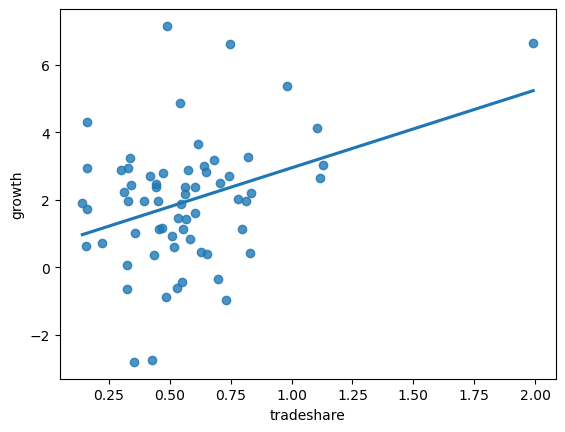

In [74]:
sns.regplot(x=gr.tradeshare, y=gr.growth, ci=False)
plt.show()

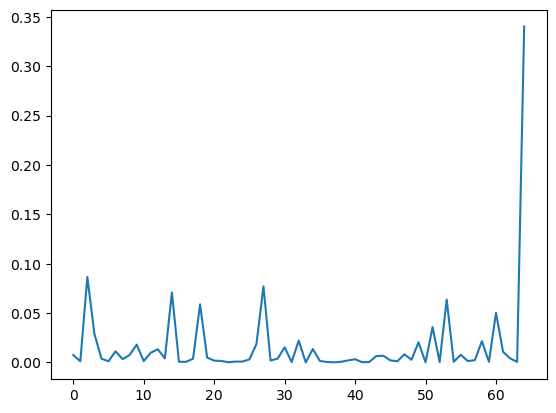

In [75]:
reg1 = smf.ols('growth~tradeshare', data=gr).fit()
cd = reg1.get_influence().summary_frame().cooks_d
cd.plot()
plt.show()

In [76]:
gr.country_name[cd >= 4/len(gr)]

2                  Japan
14                 Zaire
27    Korea, Republic of
53         Taiwan, China
64                 Malta
Name: country_name, dtype: object

In [77]:
di = pd.read_csv('data/diamonds.csv')
di.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [78]:
di.corr()

/var/folders/h_/lxrkd3yx3w11tnfvg06j7l140000gn/T/ipykernel_46695/3011832155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  di.corr()


,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [79]:
smf.ols('price ~ x+y', data=di).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                 9.700e+04
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:15:09   Log-Likelihood:            -4.8264e+05
No. Observations:               53940   AIC:                         9.653e+05
Df Residuals:                   53937   BIC:                         9.653e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.411e+04     41.737   -337.951      0.000   -1.42e+04    -1.4e+04
x           2912.2238     31.956     91.133      0.000    2849.590    2974.857
y            234.9740     31.386      7.487      0.000     173.458     296.490
==============================================================================
Omnibus:                    18854.275   Durbin-Watson:                   0.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144118.452
Skew:                           1.479   Prob(JB):                         0.00
Kurtosis:                      10.442   Cond. No.                         47.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
smf.ols('x ~ y', data=di).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 1.026e+06
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        14:15:09   Log-Likelihood:                -1916.6
No. Observations:               53940   AIC:                             3837.
Df Residuals:                   53938   BIC:                             3855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2414      0.006     43.680      0.000       0.231       0.252
y              0.9573      0.001   1012.793      0.000       0.955       0.959
==============================================================================
Omnibus:                   244690.794   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1767166921686.468
Skew:                        -154.327   Prob(JB):                         0.00
Kurtosis:                   28042.007   Cond. No.                         30.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
1/(1-0.95)

19.999999999999982

In [82]:
# Interpretation of beta coefficients
# (intercept, slope, univariate, multivariate, using dummies)

# Statistical Significance
# (t-statistic, p-value, confidence interval)

# Goodness of fit
# (R-Squared, Adjusted R-Squared)

# Fitted Values and Residuals
# (Computed fitted values and residuals, interpretation)

# Specifying Models for Forecasting
# (Forward Selection, Backward Selection)

# Specifying Models for Policy Making
# (Identifying confounding variables;
#  numerical and categorical;
#  Reducing Omitted Variable Bias)

In [83]:
he = pd.read_csv('data/housingEdited.csv')
he.head()

,id,zipCode,yearBuilt,price,livingSpace,lotSpace,bedrooms,bathrooms,noFloors,basement,waterfront
0,439,98115,2000,438000,1270,1372,2,2,3,No,Yes
1,607,98103,2000,531000,1270,1175,2,3,2,Yes,Yes
2,2462,98040,2000,1700000,4930,14649,5,5,2,Yes,Yes
3,2748,98075,2000,726000,2970,10335,5,3,2,No,Yes
4,2856,98122,2000,582000,1670,1189,4,3,3,Yes,Yes


In [89]:
# 1. Price = b0 + b1(Bedroooms) + Error

reg1 = smf.ols('price ~ bedrooms', data=he).fit()
reg1.params

Intercept     90699.898381
bedrooms     162521.328288
dtype: float64

In [93]:
reg1.params['Intercept'] + reg1.params['bedrooms'] * 2

415742.5549568966

In [94]:
# 2.

reg2 = smf.ols('price ~ basement', data=he).fit()
reg2.params

Intercept          592483.809942
basement[T.Yes]    125430.301823
dtype: float64

In [95]:
# 3.

reg3 = smf.ols('price ~ waterfront', data=he).fit()
reg3.params

Intercept            653827.614786
waterfront[T.Yes]    -39548.536355
dtype: float64

In [96]:
# 4. 
reg1.rsquared_adj, reg2.rsquared_adj, reg3.rsquared_adj

(0.11008418053893898, 0.010193941365298054, -0.0005987146066970261)

In [97]:
reg4 = smf.ols('price ~ lotSpace + bedrooms', data=he).fit()
reg4.params

Intercept     84476.714191
lotSpace          0.710279
bedrooms     161113.991416
dtype: float64

In [100]:
reg5 = smf.ols('price ~ lotSpace + bathrooms', data=he).fit()
reg5.params

Intercept   -293933.941597
lotSpace          0.338549
bathrooms    349225.370486
dtype: float64

In [101]:
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     118.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           6.05e-43
Time:                        14:45:54   Log-Likelihood:                -7383.3
No. Observations:                 512   AIC:                         1.477e+04
Df Residuals:                     509   BIC:                         1.479e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.939e+05   6.37e+04     -4.613      0.000   -4.19e+05   -1.69e+05
lotSpace       0.3385      0.299      1.130      0.259      -0.250       0.927
bathrooms   3.492e+05    2.3e+04     15.151      0.000    3.04e+05    3.95e+05
==============================================================================
Omnibus:                      445.283   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13356.150
Skew:                           3.671   Prob(JB):                         0.00
Kurtosis:                      26.920   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
reg5.rsquared_adj

0.3148040964826513

In [107]:
reg5.resid.mean()

-8.230927051045001e-10

In [106]:
reg5.resid.median()

-53107.31322805444

In [110]:
reg5.fittedvalues.mean()

634130.5898437508